# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    #https://api.openweathermap.org/data/2.5/weather?q=dukat&appid=

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | diglur
Processing Record 2 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | sumbawa
City not found. Skipping...
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | sungaipenuh
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | williston
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | dzhebariki-khaya
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | huanuni
Processing Record 21 of 

Processing Record 36 of Set 4 | hit
Processing Record 37 of Set 4 | carballo
Processing Record 38 of Set 4 | jasper
Processing Record 39 of Set 4 | san jose
Processing Record 40 of Set 4 | inongo
Processing Record 41 of Set 4 | abnub
Processing Record 42 of Set 4 | tambopata
Processing Record 43 of Set 4 | djibo
Processing Record 44 of Set 4 | samusu
City not found. Skipping...
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | vila franca do campo
Processing Record 47 of Set 4 | mitsamiouli
Processing Record 48 of Set 4 | hofn
Processing Record 49 of Set 4 | conop
Processing Record 0 of Set 5 | rosarito
Processing Record 1 of Set 5 | san andres
Processing Record 2 of Set 5 | tilichiki
Processing Record 3 of Set 5 | saint anthony
Processing Record 4 of Set 5 | kachiry
Processing Record 5 of Set 5 | zhezkazgan
Processing Record 6 of Set 5 | kud
Processing Record 7 of Set 5 | impfondo
Processing Record 8 of Set 5 | attawapiskat
City not found. Skipping...
Processing 

Processing Record 25 of Set 8 | karpogory
Processing Record 26 of Set 8 | ladario
Processing Record 27 of Set 8 | linxia
Processing Record 28 of Set 8 | los llanos de aridane
Processing Record 29 of Set 8 | xuddur
Processing Record 30 of Set 8 | torbat-e jam
Processing Record 31 of Set 8 | buraydah
Processing Record 32 of Set 8 | saint george
Processing Record 33 of Set 8 | sesvete
Processing Record 34 of Set 8 | forio
Processing Record 35 of Set 8 | viedma
Processing Record 36 of Set 8 | clinton
Processing Record 37 of Set 8 | half moon bay
Processing Record 38 of Set 8 | rocha
Processing Record 39 of Set 8 | yerbogachen
Processing Record 40 of Set 8 | loiza
Processing Record 41 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 42 of Set 8 | yarensk
Processing Record 43 of Set 8 | maneadero
Processing Record 44 of Set 8 | sargodha
Processing Record 45 of Set 8 | catuday
Processing Record 46 of Set 8 | taltal
Processing Record 47 of Set 8 | vostok
Processing Record 48 o

Processing Record 9 of Set 12 | dano
Processing Record 10 of Set 12 | uvalde
Processing Record 11 of Set 12 | mantua
Processing Record 12 of Set 12 | asau
Processing Record 13 of Set 12 | robertsport
Processing Record 14 of Set 12 | kimbe
Processing Record 15 of Set 12 | la rioja
Processing Record 16 of Set 12 | san quintin
Processing Record 17 of Set 12 | bengkulu
Processing Record 18 of Set 12 | watsa
Processing Record 19 of Set 12 | kottagudem
Processing Record 20 of Set 12 | capreol
Processing Record 21 of Set 12 | marsala
Processing Record 22 of Set 12 | warin chamrap
Processing Record 23 of Set 12 | caiaponia
Processing Record 24 of Set 12 | bull savanna
Processing Record 25 of Set 12 | gerede
Processing Record 26 of Set 12 | longyearbyen
Processing Record 27 of Set 12 | waw
Processing Record 28 of Set 12 | wadi maliz
Processing Record 29 of Set 12 | darhan
Processing Record 30 of Set 12 | turayf
Processing Record 31 of Set 12 | tual
Processing Record 32 of Set 12 | letychiv
Proc

In [4]:
#city_data

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Diglur,18.5500,77.6000,29.58,48,92,5.27,IN,1682278501
1,Khatanga,71.9667,102.5000,-19.10,99,57,2.15,RU,1682278502
2,Bilibino,68.0546,166.4372,-6.45,66,76,2.58,RU,1682278502
3,Mataura,-46.1927,168.8643,5.16,94,96,3.31,NZ,1682278503
4,Albany,42.6001,-73.9662,10.87,89,100,0.45,US,1682278401
5,Tuktoyaktuk,69.4541,-133.0374,-21.00,84,75,3.09,CA,1682278503
6,Cabo San Lucas,22.8909,-109.9124,34.61,20,0,2.06,MX,1682278371
7,Butaritari,3.0707,172.7902,28.06,80,68,7.17,KI,1682278504
8,Sungaipenuh,-2.0833,101.3833,18.74,97,100,1.08,ID,1682278504
9,Williston,48.1470,-103.6180,7.80,35,8,0.89,US,1682278505


In [7]:
# convert unix timestamp to date,time
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = "s")

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Diglur,18.5500,77.6000,29.58,48,92,5.27,IN,2023-04-23 19:35:01
1,Khatanga,71.9667,102.5000,-19.10,99,57,2.15,RU,2023-04-23 19:35:02
2,Bilibino,68.0546,166.4372,-6.45,66,76,2.58,RU,2023-04-23 19:35:02
3,Mataura,-46.1927,168.8643,5.16,94,96,3.31,NZ,2023-04-23 19:35:03
4,Albany,42.6001,-73.9662,10.87,89,100,0.45,US,2023-04-23 19:33:21


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

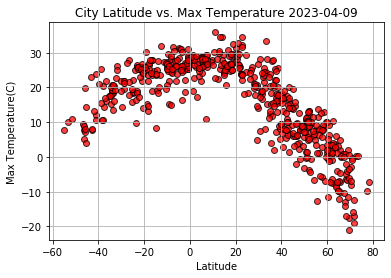

In [10]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Max Temperature 2023-04-09")
plt.ylabel('Max Temperature(C)')
plt.xlabel('Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

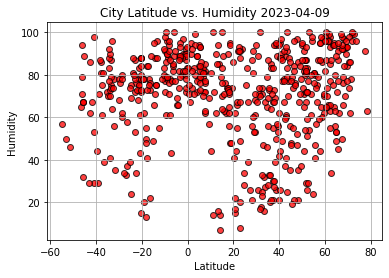

In [11]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Humidity 2023-04-09")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

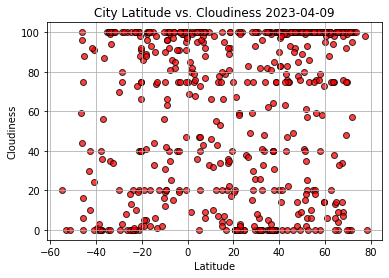

In [12]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df['Lat'], city_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Cloudiness 2023-04-09")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

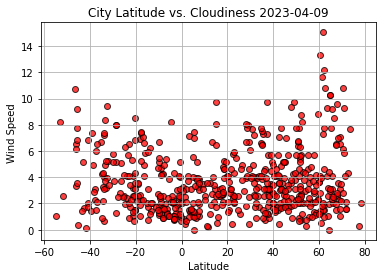

In [13]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Cloudiness 2023-04-09")
plt.ylabel('Wind Speed ')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

#                  (x - based on to predict #y - to predict) predict temp bssed on latitude
#slop,intercept, rvalue, pvalue = stats.linregress(weather['lat'], weather['temp'])
def create_linear_plots(lat, yvalue,x,y):
    slope, intercept, rvalue, pvalue, stderr = linregress(lat, yvalue)
    #slope and intercept are defined
    y_prd= slope*lat+ intercept 
    plt.plot(lat, y_prd, color="red")
    eq="y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(eq, xy=(x,y),color="red", fontsize=18)
    #Scatter plot and a line
    #city_data_df.plot(kind = "scatter", x="lat", y="y", marker="o")
    print("The r-value is: ",rvalue**2)
    plt.scatter(lat, yvalue)
    plt.ylabel(yvalue.name)
    plt.xlabel('Latitude')
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df= city_data_df.loc[(city_data_df['Lat']>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Diglur,18.5500,77.6000,29.58,48,92,5.27,IN,2023-04-23 19:35:01
1,Khatanga,71.9667,102.5000,-19.10,99,57,2.15,RU,2023-04-23 19:35:02
2,Bilibino,68.0546,166.4372,-6.45,66,76,2.58,RU,2023-04-23 19:35:02
4,Albany,42.6001,-73.9662,10.87,89,100,0.45,US,2023-04-23 19:33:21
5,Tuktoyaktuk,69.4541,-133.0374,-21.00,84,75,3.09,CA,2023-04-23 19:35:03


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Mataura,-46.1927,168.8643,5.16,94,96,3.31,NZ,2023-04-23 19:35:03
8,Sungaipenuh,-2.0833,101.3833,18.74,97,100,1.08,ID,2023-04-23 19:35:04
10,Busselton,-33.6500,115.3333,13.54,87,100,8.39,AU,2023-04-23 19:35:05
11,New Norfolk,-42.7826,147.0587,7.72,62,10,1.63,AU,2023-04-23 19:35:06
12,Atuona,-9.8000,-139.0333,27.45,77,19,6.68,PF,2023-04-23 19:30:12


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  0.7713573612668908


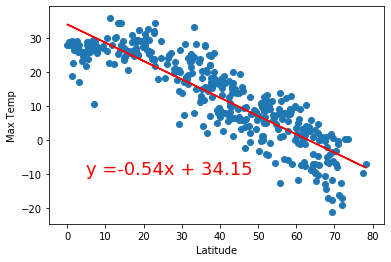

In [17]:
# Linear regression on Northern Hemisphere
lat = northern_hemi_df["Lat"]
yvalue = northern_hemi_df["Max Temp"]
create_linear_plots(lat, yvalue,5,-10)

The r-value is:  0.5013020448137234


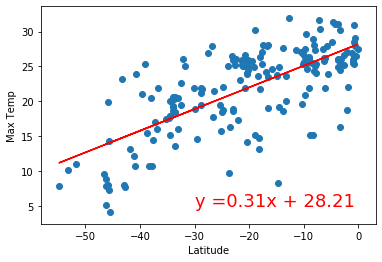

In [18]:
# Linear regression on Southern Hemisphere
lat = southern_hemi_df["Lat"]
yvalue = southern_hemi_df["Max Temp"]
create_linear_plots(lat, yvalue,-30,5)

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and temperature in the Northern Hemisphere (r-value is 0.77). The closer location to equator, the higher temperature it has. As for Southern Hemisphere, there is a decent positive correlation (r-value is 0.5), and the points are more spread out then in Northern Hemisphere.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.014357844007591491


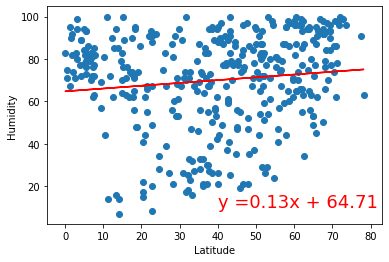

In [19]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
yvalue = northern_hemi_df["Humidity"]
create_linear_plots(lat, yvalue,40,10)

The r-value is:  0.12396907825109264


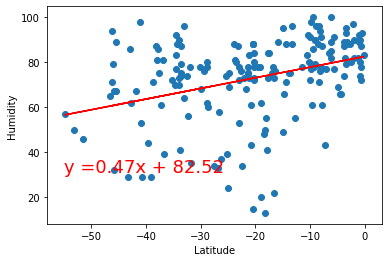

In [20]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
yvalue = southern_hemi_df["Humidity"]
create_linear_plots(lat, yvalue,-55,31)

**Discussion about the linear relationship:** r-values in Northern Hemispere and South Hemisphere are almost zero - 0.01 and 0.12, and the points are spred out. There is no correlation between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.01497646799892229


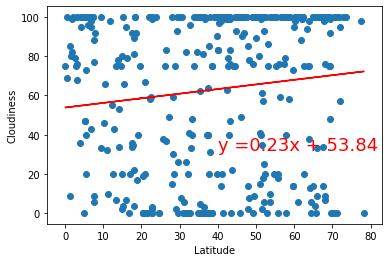

In [21]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
yvalue = northern_hemi_df["Cloudiness"]
create_linear_plots(lat, yvalue,40,32)

The r-value is:  0.07795582685280689


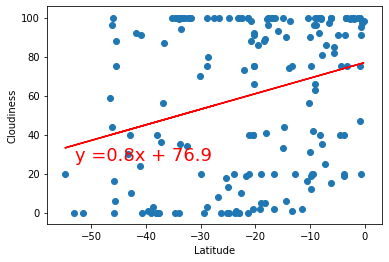

In [22]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
yvalue = southern_hemi_df["Cloudiness"]
create_linear_plots(lat, yvalue,-53,27)

**Discussion about the linear relationship:** R-values in both hemispheres are almost zero. There is no correlation between latitude and cloudiness. The slope in sourthen hemisphere is slightly higer then in Northern but the spots are spread out all over the place. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  0.03225951719827567


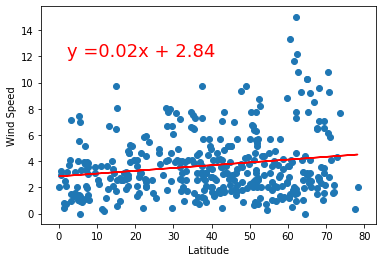

In [23]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
yvalue = northern_hemi_df["Wind Speed"]
create_linear_plots(lat, yvalue,2,12)

The r-value is:  0.11682172222783695


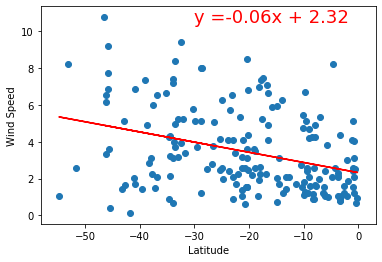

In [24]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
yvalue = southern_hemi_df["Wind Speed"]
create_linear_plots(lat, yvalue,-30,10.5)

**Discussion about the linear relationship:** The slope is almost flat in Northern Hemisphere and r-value is 0.03. In the Sourthern Hemosphere r-value is 0.11. There is no correlation between latitude and wind speed. 